In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# !pip install arch numpy matplotlib
!pip install matplotlib

Рассмотрим данные об общей численности населения (**population size**), чистой миграции (**net migration**) и общий коэффициент рождаемости (**fertility rate**) по годам в РФ.

In [6]:
data = pd.read_csv('WB_Russia.csv', delimiter=';')
data

,year,factory,agro,import
0,1989,"46,59685864","15,60209424","21,0122164"
1,1990,"45,00357032","15,46103695","17,94473766"
2,1991,"45,8648552","13,77189846","12,98534144"
3,1992,"42,25027144","7,263364019","48,25460284"
4,1993,"40,52550522","7,557203778","30,49384876"
5,1994,"41,21529267","6,109561032","23,19533361"
6,1995,"34,53919264","6,692231083","25,89389412"
7,1996,"35,34670425","6,549375242","21,84951269"
8,1997,"34,68922704","5,869762144","22,52707988"
9,1998,"33,94402924","5,103393148","24,55104781"


**Построим графики выбранных показателей.**

In [11]:
data['factory'] = data['factory'].str.replace(',', '.').astype(float)
data['agro'] = data['agro'].str.replace(',', '.').astype(float)
data['import'] = data['import'].str.replace(',', '.').astype(float)


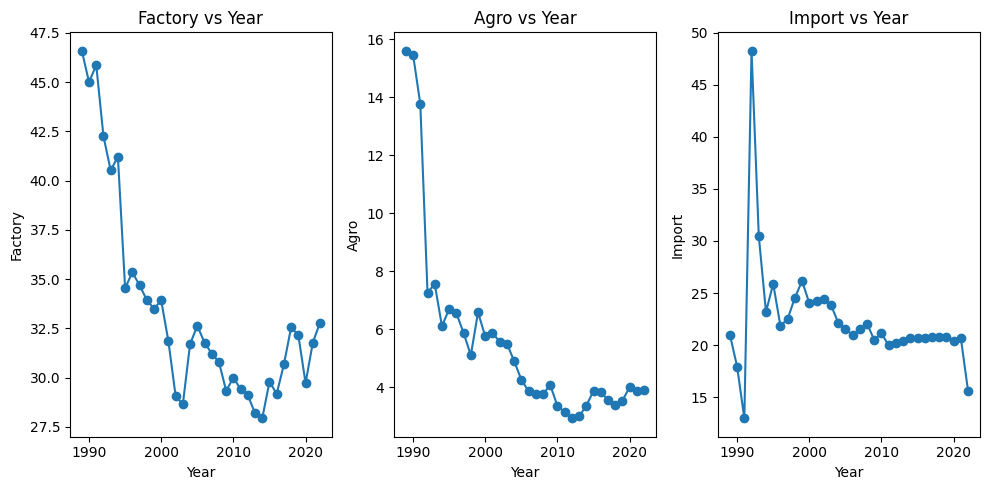

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.plot(data['year'], data['factory'], marker='o')
plt.xlabel('Year')
plt.ylabel('Factory')
plt.title('Factory vs Year')

plt.subplot(132)
plt.plot(data['year'], data['agro'], marker='o')
plt.xlabel('Year')
plt.ylabel('Agro')
plt.title('Agro vs Year')

plt.subplot(133)
plt.plot(data['year'], data['import'], marker='o')
plt.xlabel('Year')
plt.ylabel('Import')
plt.title('Import vs Year')

plt.tight_layout()
plt.show()

Первый график показывает явное присутствие положительного тренда, с большой вероятностью первый временной ряд не стационарен. По двум другим графикам сложно определить стационарность ряда, необходимы строкие тесты, однако, на первый взгляд кажется, что и они не стационарны.

# Тесты единичного корня

**Проведем тесты единичного корня для ряда "Промышленность":**

In [14]:
from arch.unitroot import PhillipsPerron
from arch.unitroot import ADF
from arch.unitroot import KPSS

In [16]:
def unit_root_tests(data):
    results = {}
    print("Проведение ADF теста без тренда:")
    adf_test = ADF(data, trend='n')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]

    print("\nПроведение ADF теста с трендом:")
    adf_test = ADF(data, trend='ct')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['trend_ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]
    
    print("\nПроведение PP теста без тренда:")
    pp_test = PhillipsPerron(data, trend='n')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]

    print("\nПроведение PP теста с трендом:")
    pp_test = PhillipsPerron(data, trend='ct')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['trend_PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]
    
    print("\nПроведение KPSS теста без тренда:")
    kpss_test = KPSS(data, trend='c')
    print(f'KPSS Statistic: {kpss_test.stat}')
    print(f'p-value: {kpss_test.pvalue}')
    results['KPSS'] = [kpss_test.null_hypothesis, kpss_test.stat, kpss_test.pvalue]

    print("\nПроведение KPSS теста с трендом:")
    kpss_test = KPSS(data, trend='ct')
    print(f'KPSS Statistic: {kpss_test.stat}')
    print(f'p-value: {kpss_test.pvalue}')
    results['trend_KPSS'] = [kpss_test.null_hypothesis, kpss_test.stat, kpss_test.pvalue]

    return results
    

In [31]:
res_1 = unit_root_tests(data['factory'])

Проведение ADF теста без тренда:
ADF Statistic: -1.8353552692462558
p-value: 0.06326383763196063

Проведение ADF теста с трендом:
ADF Statistic: -2.1457020285470922
p-value: 0.5204286832834046

Проведение PP теста без тренда:
PP Statistic: -1.6811429345788929
p-value: 0.08776021600419004

Проведение PP теста с трендом:
PP Statistic: -1.216336185205997
p-value: 0.9071016239515767

Проведение KPSS теста без тренда:
KPSS Statistic: 0.6626902842566206
p-value: 0.015757339463986192

Проведение KPSS теста с трендом:
KPSS Statistic: 0.22200707192550578
p-value: 0.009041048526488134


Рассмотрим результаты различных тестов на единичный корень для временного ряда "Промышленность":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает, что данный временной ряд **не стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает, что данный временной ряд **не стационарен**, (p-value > 0.05)

3. Согласно KPSS тестам с трендом и без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает, что данный временной ряд **не стационарен**, (p-value < 0.05)


Вывод: по результатам всех проведенных тестов временной ряд "Промышленность" **не стационарен**

**Проведем тесты единичного корня для ряда "Сельское хозяйство":**

In [30]:
res_2 = unit_root_tests(data['agro'])

Проведение ADF теста без тренда:
ADF Statistic: -3.3931546858067954
p-value: 0.0007076702279274331

Проведение ADF теста с трендом:
ADF Statistic: -3.0726175727420526
p-value: 0.11289593966368017

Проведение PP теста без тренда:
PP Statistic: -3.5285698558745113
p-value: 0.0004363205612455883

Проведение PP теста с трендом:
PP Statistic: -4.181862852536234
p-value: 0.004767640224906304

Проведение KPSS теста без тренда:
KPSS Statistic: 0.6994797027664249
p-value: 0.012991733234362922

Проведение KPSS теста с трендом:
KPSS Statistic: 0.18231588545081198
p-value: 0.022466038427416502


Рассмотрим результаты различных тестов на единичный корень для временного ряда "Сельское хозяйство":
1. Согласно расширенным тестам Дики-Фуллера (ADF) без тренда, мы **отвергаем нулевую гитотезу** о наличии единиченого корня, что означает, что данный временной ряд **стационарен**, (p-value < 0.05)

2. Согласно расширенным тестам Дики-Фуллера (ADF) с тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает, что данный временной ряд **не стационарен**, (p-value > 0.05)

3. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает, что данный временной ряд **не стационарен**, (p-value < 0.05)

4. Согласно KPSS тестам с трендом и без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает, что данный временной ряд **не стационарен**, (p-value < 0.05)


Вывод: по результатам всех проведенных тестов временной ряд "Сельское хозяйство" скорее всего **не стационарен**

**Проведем тесты единичного корня для ряда "Импорт":**

In [29]:
res_3 = unit_root_tests(data['import'])

Проведение ADF теста без тренда:
ADF Statistic: -0.6167394200646379
p-value: 0.44761803184147636

Проведение ADF теста с трендом:
ADF Statistic: -5.707334139219228
p-value: 8.8497077996727e-06

Проведение PP теста без тренда:
PP Statistic: -0.7061253013077096
p-value: 0.41002932156702093

Проведение PP теста с трендом:
PP Statistic: -7.486595397546937
p-value: 1.0941381910641903e-09

Проведение KPSS теста без тренда:
KPSS Statistic: 0.5421101475656058
p-value: 0.03125749105909664

Проведение KPSS теста с трендом:
KPSS Statistic: 0.10625748645534845
p-value: 0.13820165659565017


Рассмотрим результаты различных тестов на единичный корень для временного ряда "Импорт":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **не можем отвергнуть нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **не стационарен**, (p-value > 0.05)

3. Согласно KPSS тесту без тренда, мы **отвергаем нулевую гитотезу** о стационарности, что означает что данный временной ряд **не стационарен**, (p-value < 0.05)

4. Согласно KPSS тесту с трендом, мы **не можем отвергнуть нулевую гитотезу** о стационарности, что означает что данный временной ряд **стационарен**, (p-value > 0.05)


Вывод: Временной ряд "Импорт" скорее всего **не стационарен**

**Рассчитаем значения временного ряда цепного прироста для импорта и проведём для него тесты единиченого корня:**

In [34]:
def for_dy(data):
    results = {}
    print("Проведение ADF теста без тренда:")
    adf_test = ADF(data, trend='n')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]

    print("\nПроведение ADF теста с трендом:")
    adf_test = ADF(data, trend='ct')
    print(f'ADF Statistic: {adf_test.stat}')
    print(f'p-value: {adf_test.pvalue}')
    results['trend_ADF'] = [adf_test.null_hypothesis, adf_test.stat, adf_test.pvalue]
    
    print("\nПроведение PP теста без тренда:")
    pp_test = PhillipsPerron(data, trend='n')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]

    print("\nПроведение PP теста с трендом:")
    pp_test = PhillipsPerron(data, trend='ct')
    print(f'PP Statistic: {pp_test.stat}')
    print(f'p-value: {pp_test.pvalue}')
    results['trend_PP'] = [pp_test.null_hypothesis, pp_test.stat, pp_test.pvalue]
    return results


In [35]:
d_y = pd.DataFrame(columns=['d_import'])
for i in np.array(data.index)[1:]:
    d_y.loc[ len(d_y.index )] = data['import'][i] - data['import'][i-1]
res_d_3 = for_dy(d_y['d_import'])
# d_y['d_import']

Проведение ADF теста без тренда:
ADF Statistic: -8.54127403010809
p-value: 1.9053567114578743e-14

Проведение ADF теста с трендом:
ADF Statistic: -8.32372908912024
p-value: 1.2771884972646413e-11

Проведение PP теста без тренда:
PP Statistic: -14.19995102288258
p-value: 1.378916016659514e-25

Проведение PP теста с трендом:
PP Statistic: -13.885554275062741
p-value: 1.3998184487146321e-21


Рассмотрим результаты различных тестов на единичный корень для временного ряда цепного прироста ряда "Импорт":
1. Согласно расширенным тестам Дики-Фуллера (ADF) с трендом и без тренда, мы **отвергаем нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **стационарен**, (p-value > 0.05)

2. Согласно тестам Филлипса-Перрона (PP) с трендом и без тренда, мы **отвергаем нулевую гитотезу** о наличии единиченого корня, что означает что данный временной ряд **стационарен**, (p-value > 0.05)

Вывод: Временной ряд цепного прироста ряда "Импорт" скорее всего **стационарен**

**Построим график временного ряда цепного прироста для импорта**

Text(0, 0.5, 'Цепной прирост импорта')

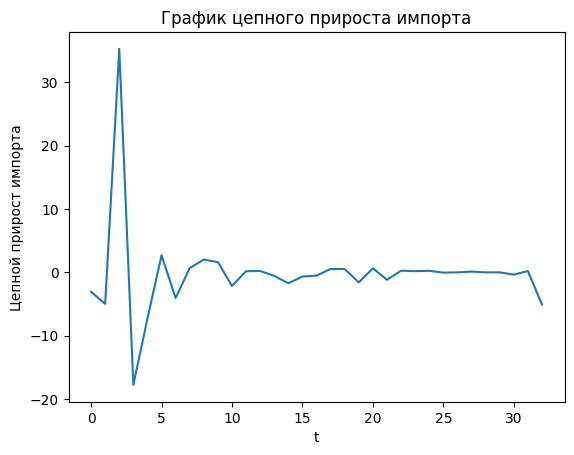

In [28]:
plt.plot(d_y['d_import'])
plt.title('График цепного прироста импорта')
plt.xlabel('t')
plt.ylabel('Цепной прирост импорта')

**Выведем результаты тестов единичного корня для импорта и цепного прироста импорта в виде сводной таблицы:**

In [36]:
res_table_y = pd.DataFrame(columns = ['ВР', 'Тест', 'Нулевая гипотеза', 'Статистика критерия', 'p-value', 'Вывод'])
for key in res_3.keys():
    conclusion = ''
    if res_3[key][2] >=0.05:
        conclusion += 'Не можем отвергнуть нулевую гипотезу. '
    else:
        conclusion += 'Отвергаем нулевую гипотезу. '
    res_table_y.loc[len(res_table_y.index)] = ['y', key, res_3[key][0], res_3[key][1], res_3[key][2], conclusion]

for key in res_d_3.keys():
    conclusion = ''
    if res_d_3[key][2] >=0.05:
        conclusion += 'Не можем отвергнуть нулевую гипотезу. '
    else:
        conclusion += 'Отвергаем нулевую гипотезу. '
    res_table_y.loc[len(res_table_y.index)] = ['Δy', key, res_d_3[key][0], res_d_3[key][1], res_d_3[key][2], conclusion]
res_table_y  

,ВР,Тест,Нулевая гипотеза,Статистика критерия,p-value,Вывод
0,y,ADF,The process contains a unit root.,-0.616739,4.476180e-01,Не можем отвергнуть нулевую гипотезу.
1,y,trend_ADF,The process contains a unit root.,-5.707334,8.849708e-06,Отвергаем нулевую гипотезу.
2,y,PP,The process contains a unit root.,-0.706125,4.100293e-01,Не можем отвергнуть нулевую гипотезу.
3,y,trend_PP,The process contains a unit root.,-7.486595,1.094138e-09,Отвергаем нулевую гипотезу.
4,y,KPSS,The process is weakly stationary.,0.542110,3.125749e-02,Отвергаем нулевую гипотезу.
5,y,trend_KPSS,The process is weakly stationary.,0.106257,1.382017e-01,Не можем отвергнуть нулевую гипотезу.
6,Δy,ADF,The process contains a unit root.,-8.541274,1.905357e-14,Отвергаем нулевую гипотезу.
7,Δy,trend_ADF,The process contains a unit root.,-8.323729,1.277188e-11,Отвергаем нулевую гипотезу.
8,Δy,PP,The process contains a unit root.,-14.199951,1.378916e-25,Отвергаем нулевую гипотезу.
9,Δy,trend_PP,The process contains a unit root.,-13.885554,1.399818e-21,Отвергаем нулевую гипотезу.


Видим, что временной ряд цепного прироста импорта является не стационарным рядом, как и исходный временной ряд.

?????????????Так как цепной прирост это разность первого порядка от исходного временного ряда, то можем сделать предположение о степени интегрируемости данного временного ряда равной 1 и ряд имеет разностно-стационарный характер.?????????

**Рассчитаем степени интегрируемости для наших времянных рядов**

In [38]:
def find_order_of_integration(data):
    pv = ADF(data).pvalue
    if pv > 0.05:
        diff_data = data.diff().dropna()
        return 1 + find_order_of_integration(diff_data)
    else:
        return 0

In [39]:
d1 = find_order_of_integration(data['factory'])
d2 = find_order_of_integration(data['agro'])
d3 = find_order_of_integration(data['import'])

print(f'Для ВР "Промышленность" степень интегрируемости: {d1}')
print(f'Для ВР "Сельское хозяйство" степень интегрируемости: {d2}')
print(f'Для ВР "Импорт" степень интегрируемости: {d3}')

Для ВР "Промышленность" степень интегрируемости: 0
Для ВР "Сельское хозяйство" степень интегрируемости: 0
Для ВР "Импорт" степень интегрируемости: 0


?????????????????Видим, что гипотеза о степени интегрируемости времянного ряда общего коэффициента рождаемости, равного единице подтвердилась. Также степерь интегрируемости остальных рядов $\ge 1$, что говорит о нестационарности данных времянных рядов.????????????????????

In [40]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    pv = ADF(data).pvalue    
    if pv > 0.05:
        print("Ряд не стационарен. Проверяем на тренд-стационарность.")
        pv = ADF(data, trend = 'ct').pvalue
        if pv <= 0.05:
            print("Ряд тренд-стационарен.")
        else:
            print("Ряд не тренд-стационарен. Проверяем на разностно-стационарность.")
            diff_data = data.diff().dropna()
            pv = ADF(diff_data).pvalue
            if pv <= 0.05:
                print("Ряд разностно-стационарен.")
            else:
                print("Ряд не разностно-стационарен.")
    else:
        print("Ряд стационарен.")

**Проверим ряды на тренд-стационарность и разностно-стационарность:**

In [41]:
check_stationarity(data['factory'])

Ряд стационарен.


In [42]:
check_stationarity(data['agro'])

Ряд стационарен.


In [43]:
check_stationarity(data['import'])

Ряд стационарен.


**Проведем Zivot-Andrews тест для данных об импорте, поскольку график этого ряда больше всего напоминает график со структурным сдвигом.**

In [44]:
from arch.unitroot import ZivotAndrews

za_test = ZivotAndrews(data['import'])
print(za_test.summary())


        Zivot-Andrews Results        
Test Statistic                 -5.692
P-value                         0.002
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.



Нулевая гипотеза (H0): Временной ряд имеет единичный корень с трендом.
Альтернативная гипотеза: Временной ряд является трендово-стационарным процессом с однократным в тренде.
Тест Zivot-Andrews указывает на то, что временной ряд “Импорт” не стационарен.